In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
import networkx as nx
import scipy
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import seaborn as sns

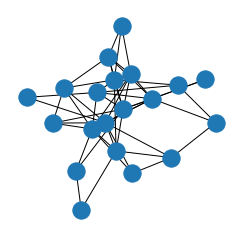

In [4]:
# Generate Erdos Renyi graphs based on probability
graph = nx.erdos_renyi_graph(n=20, p=0.3)
#new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
fig_graph.add_subplot(2,2,1)
nx.draw(graph)
adj= nx.to_numpy_array(graph)




In [63]:
def motion(q_0, t_span, omegas, K, N, adj):
    s1 = odeint(func= kuramoto_1, y0 = q_0, t=t_span, args=(omegas, K, N, adj) )
    q = s1[:,::]
    dq = np.zeros(np.shape(q))
    for i in range(len(t_span)):
        dq[i] = kuramoto_1(q[i], t_span[i], omegas, K, N, adj)
    return q, dq


def rossler(_q, _t, _a, _b, _c, _sigma, _r, _N, _adj):
    _dq = np.zeros(np.shape(_q))
    x, y, z = _q[0::3], _q[1::3], _q[2::3]
    dx, dy, dz = _dq[0::3], _dq[1::3], _dq[2::3]
    
    # N nodi della rete
    for i in range(_N):
        dx[i] =  -y[i] - z[i] + _sigma/(2*_r*_N) * np.sum( _adj[i] * (x - x[i]) )
        dy[i] =  x[i] + _a*y[i] + _sigma/(2*_r*_N) * np.sum( _adj[i] * (y - y[i]) )
        dz[i] =  _b + z[i]*(x[i] - _c) + _sigma/(2*_r*_N) * np.sum( _adj[i] * (z - z[i]) )
            
    return _dq
    

def r_parameter(_q, _N):
    _r = np.abs( np.sum( np.exp(np.cdouble(_q)*1j) / _N ))
    return _r

def r_mean_parameter(_q_0, _t_span, _omegas, _K , _N, _adj):
    _r_mean = 0
    _q, _dq = motion( _q_0, _t_span, _omegas, _K, _N, _adj)
    for t_count in range(len(_t_span)):
        _r_mean += r_parameter(_q[t_count,:], _N)
    #media
    _r_mean *= 1./len(t_span)
    return _r_mean


In [75]:
random.seed(0)

# parameters model 
N = 1

# initial conditions
q_0 = np.random.rand(3*N)*2*np.pi

# simulation 
dt = 0.0001
t_max = 200
t_span = np.arange(0, t_max, dt)

a = 0.2
b = 0.2
c = 5.7

In [76]:
sol = odeint(func= rossler, y0 = q_0, t=t_span, args=(a, b, c, 1, 1, N, adj) )

2000000


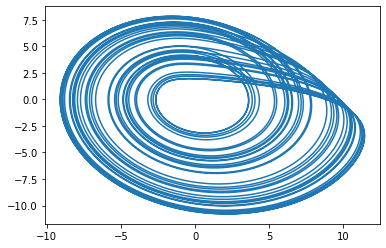

In [77]:
print(len(sol[:,1]))
plt.plot(sol[:,0], sol[:,1])

In [ ]:
# for one simulation
# integrating the system
sol = odeint(func= kuramoto_1, y0 = q_0, t=t_span, args=(omegas, K, N, adj) )
q = sol[:,::]
dq = np.zeros(np.shape(q))
for i in range(len(t_span)):
    dq[i] = kuramoto_1(q[i], t_span[i], omegas, K, N, adj)
    
# new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
axs_graph = [fig_graph.add_subplot(2,2,1), fig_graph.add_subplot(2,2,2), fig_graph.add_subplot(2, 2, 3), fig_graph.add_subplot(2, 2, 4)]

# plotting
axs_graph[0].plot(t_span, np.sin(q))
axs_graph[1].plot(t_span, dq)
print()

In [34]:
def kuramoto(_q, t,  _omegas, _K, _N, adj):
    _dq = np.zeros(np.shape(_q))
    for i in range(_N):
        for j in range(_N):
            _dq[i] += adj[i][j] * (_K/ ( np.sum(adj[i]) + 1) ) * np.sin(_q[j] - _q[i])
    _dq += _omegas
    return _dq

def kuramoto_1(_q,_t,  _omegas, _K, _N, adj):
    _dq = np.zeros(np.shape(_q))
    for i in range(_N):
        for j in range(_N):
            _dq[i] += adj[i][j] * np.sin(_q[j] - _q[i])
        _dq[i] /=  ( np.sum(adj[i]) + 1 )
    _dq *= K
    _dq += _omegas
    return _dq




print(kuramoto(q_0, 0, omegas, K, N, adj))
print(kuramoto_1(q_0, 0, omegas, K, N, adj))

[-25362.71841827   2050.76640952 -34051.37876743   -771.83031543
  13022.94933443  -2232.69967912   8621.22226329   6597.84004765
  18397.60689246   8038.47056929 -23896.84990937  10238.2780385
  -8375.38431066  -2097.29667698   8047.65200187  13536.62228113
   -722.26730215 -15062.28576303   7858.28967259   2337.10710701]
[-25362.71841827   2050.76640952 -34051.37876743   -771.83031543
  13022.94933443  -2232.69967912   8621.22226329   6597.84004765
  18397.60689246   8038.47056929 -23896.84990937  10238.2780385
  -8375.38431066  -2097.29667698   8047.65200187  13536.62228113
   -722.26730215 -15062.28576303   7858.28967259   2337.10710701]


In [ ]:
    _dq += _omegas